# Checking classical force and the orbit of mercury in two-body system

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
poss = np.loadtxt("../positions/mercury.txt")
#velo = np.loadtxt("../positions/mercuryvel.txt")

#poss = poss.T
#velo = velo.T

poss.shape

(3, 416)

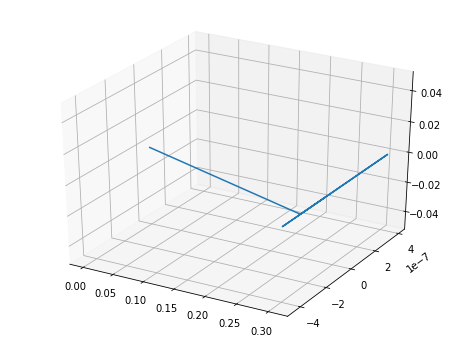

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot(poss[0, :], poss[1, :], poss[2, :])
plt.show()

In [4]:
rposs = np.linalg.norm(poss, 2, axis=0)
#absvel = np.linalg.norm(velo, 2, axis=0)


#local_minima_idx = argrelextrema(rposs, np.less)
local_not_zero = argrelextrema(rposs, lambda x, y: x > 0)

minrposs = rposs.take(local_not_zero)
#minabsvel = absvel.take(local_minima_idx)

print("Analytical perihelion = 0.3075")
print("Minimum perihelion    = {}".format(minrposs.min()))
print("Maximum perihelion    = {}".format(minrposs.max()))

#print("Analytical perihelion speed = 12.44")
#print("Minimum perihelion speed    = {}".format(minabsvel.min()))
#print("Maximum perihelion speed    = {}".format(minabsvel.max()))

Analytical perihelion = 0.3075
Minimum perihelion    = 0.30750000025675883
Maximum perihelion    = 0.3075000002695809


In [5]:
peri_poss = poss.take(local_not_zero, axis=1)[:, 0]

# ALL z values must be zero
# assert np.sum(np.abs(peri_poss[2, :])) == 0.0

tan_peri = peri_poss[1, :] / peri_poss[0, :]
tan0 = 0 / 0.3075

peri = np.arctan(tan_peri)
peri0 = np.arctan(tan0)

arcsecond = np.pi / 648000
arcdiff = (peri[-1] - peri0) / arcsecond
print("Differnce in perihelion in arcseconds: {}".format(arcdiff))

Differnce in perihelion in arcseconds: -0.20230491017964772


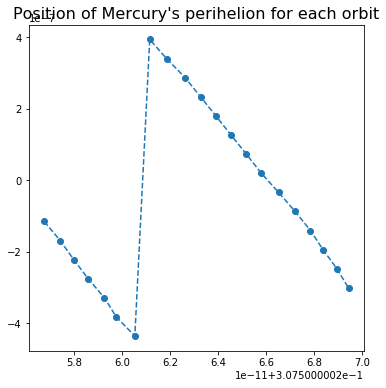

In [6]:
plt.figure(figsize=(6,6))
plt.title(r"Position of Mercury's perihelion for each orbit",
         fontsize=16)
plt.plot(peri_poss[0, :], peri_poss[1, :], "--o")
plt.show()